## Exercice 2.2

In [1]:
import tensorflow as tf
import numpy as np

### Chargement et prétraitement des données

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
import numpy as np


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

maxlen = 200 
train_data = pad_sequences(train_data, padding='post', maxlen=maxlen)
test_data = pad_sequences(test_data, padding='post', maxlen=maxlen)

print(f"Exemple de train_data[0]: {train_data[0]}")
print(f"Label correspondant: {train_labels[0]}")


### Construction d’un modèle de réseau de neurones

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

### Entrainement et évaluation du modèle

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

In [ ]:
# Évaluation sur les données de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

On détermine un test accuracy de 0.74 et un test loss de 1.05 avec les paramètres initiaux. 

### Optimisation des hyperparamètres

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Listes des hyperparamètres à tester
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
epochs = [5, 10, 15]

results = []

# Boucles pour tester toutes les combinaisons d'hyperparamètres
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epoch in epochs:
            print(f"Entrainement avec lr={lr}, batch_size={batch_size}, epochs={epoch}")

            model = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=200),
                tf.keras.layers.GlobalAveragePooling1D(),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.Dense(46, activation='softmax')  
            ])

            model.compile(optimizer=Adam(learning_rate=lr),
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
            history = model.fit(train_data, train_labels,
                                epochs=epoch,
                                batch_size=batch_size,
                                validation_data=(test_data, test_labels),
                                callbacks=[early_stopping],
                                verbose=1)
            test_loss, test_acc = model.evaluate(test_data, test_labels)
        
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'epochs': epoch,
                'test_loss': test_loss,
                'test_acc': test_acc
            })
            print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

results_array = np.array([[r['learning_rate'], r['batch_size'], r['epochs'], r['test_acc'], r['test_loss']] for r in results])

# Meilleure combinaison de paramètres en fonction de l'accuracy
best_result = results_array[np.argmax(results_array[:, 3])]
print("\nMeilleurs hyperparamètres trouvés :")
print(f"Learning rate: {best_result[0]}, Batch size: {best_result[1]}, Epochs: {best_result[2]}")
print(f"Test accuracy: {best_result[3]}, Test loss: {best_result[4]}")


On détermine que la meilleure combinaison d'hyperparamètres est:
- Learning rate: 0.001
- Batch size: 32.0,
- Epochs: 15.0

Avec un test accuracy de 0.78 et un test loss de 0.92.

## Nouveau modèle

On change uniquement les hyperparamètres car l'ajout d'une couche LTSM a un mauvais impact sur les résultats (Test accuracy: 0.6224399209022522
Test loss: 1.6730157136917114.)

In [ ]:
model2 = models.Sequential()
model2.add(layers.Embedding(input_dim=10000, output_dim=128, input_length=200))
model2.add(layers.GlobalAveragePooling1D())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))  

model2.compile(optimizer=Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history_model2 = model2.fit(train_data, train_labels,
                            epochs=15,
                            batch_size=32,
                            validation_data=(test_data, test_labels),
                            verbose=1)

In [ ]:
# Évaluation sur les données de test
test_loss, test_acc = model2.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

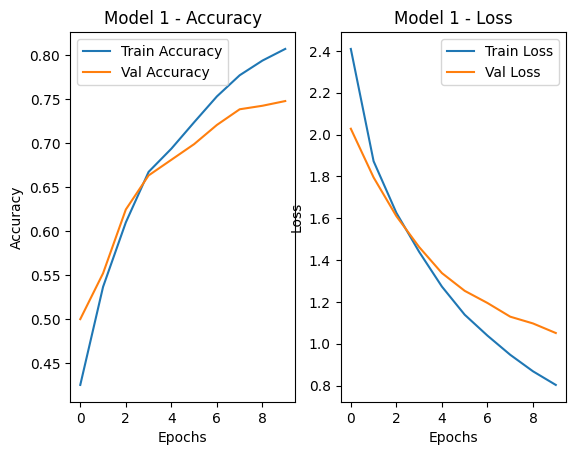

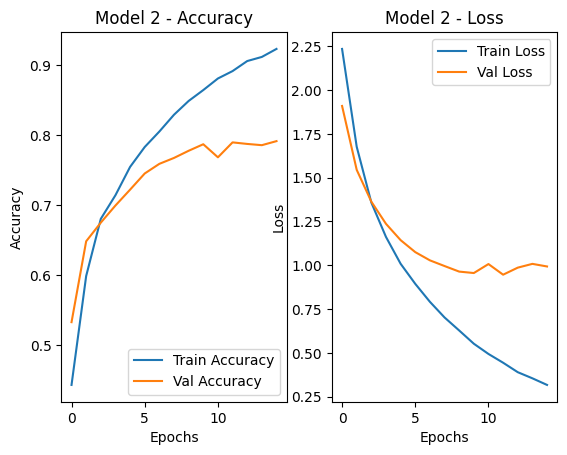

In [ ]:
import matplotlib.pyplot as plt

# Fonction pour afficher les courbes de training et validation
def plot_history(history, model_name):

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, 'Model 1')
plot_history(history_model2, 'Model 2')